## 데이터4 카테고리 기반 문제 유형
<img src="./category_2.png" width="600">

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import pandas as pd
import numpy as np
import json
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from PIL import Image, ImageDraw
import cv2
import random

import matplotlib
import matplotlib.pyplot as plt

Answers : [3, 5]


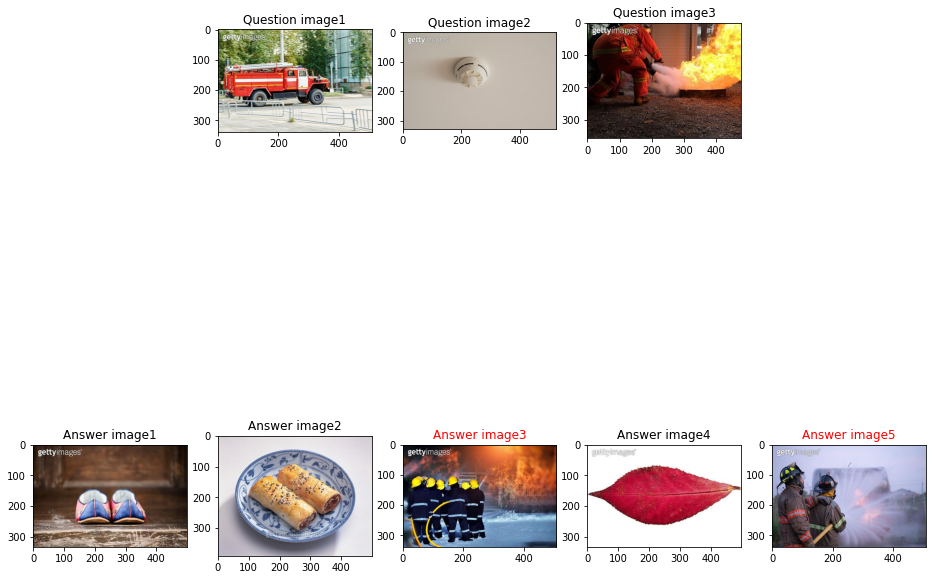

In [3]:
import os
os.chdir(f'/home/mjkim/VR/')
folder_name = os.listdir("./category_data/category_2/")[3]
os.chdir(f'/home/mjkim/VR/category_data/category_2/{folder_name}')

file_list = os.listdir(f"./")
for file_name in file_list:
    if file_name.endswith('.json'):
        json_file = file_name
        file_list.remove(file_name)
"""
print(f'jpg_list : {file_list}')
print(f'json_file : {json_file}')
"""

a_data = json.load(open(f'./{json_file}'))

questions = []
answers = []

for i in range(len(a_data['Questions'][0]['images'])):
    question_i = {'img_url' : a_data['Questions'][0]['images'][i]['image_url']}
    questions.append(question_i)

for i in range(len(a_data['Answers'])):
    answer_i = {'id' : a_data['Answers'][i]['group_id'], 'img_url' : a_data['Answers'][i]['images'][0]['image_url']}
    answers.append(answer_i)

correct_id = a_data['correct_answer_group_ID']

print(f'Answers : {correct_id}')


plt.figure(figsize=(16, 14))

# Plot Question Images

for i in range(len(questions)):
    question_img = Image.open(f'./{questions[i]["img_url"]}')
    plt.subplot(2, len(answers), i+2)
    plt.gca().set_title("Question image"+str(i+1))
    plt.imshow(question_img)

for i in range(len(answers)):
    answer_img = Image.open(f'./{answers[i]["img_url"]}')
    plt.subplot(2, len(answers), i+len(answers)+1)

    if i+1 in correct_id:
        plt.gca().set_title("Answer image"+str(i+1), color = 'r')
    else:
        plt.gca().set_title("Answer image"+str(i+1))
    plt.imshow(answer_img)

plt.show()

In [4]:
a_data

{'dataset_name': '카테고리 기반 출제(2)',
 'doc_id': '248281',
 'year': '2022',
 'difficulty': '',
 'correct_rate': '',
 'category': '소방안전',
 'type': 4,
 'answer_type': 'Multiple_choice',
 'is_correct': '',
 'correct_answer_group_ID': [3, 5],
 'Questions': [{'group_id': '160507',
   'images': [{'id': 420093,
     'image_url': '7749a8e8d374454a91bcdc0d0cedf461.jpg'},
    {'id': 420094, 'image_url': '0d128bf786b044dfbf032d935a63faa8.jpg'},
    {'id': 420095, 'image_url': 'f35cdacaaae24003a4e02f186b827e88.jpg'}]}],
 'Answers': [{'group_id': 1,
   'images': [{'id': 420096,
     'image_url': 'c64caaa76278471e877f5ad6bf6a0cd0.jpg'}]},
  {'group_id': 2,
   'images': [{'id': 420097,
     'image_url': 'c1f690fc724e4e2d8d21944f7103b6d1.jpg'}]},
  {'group_id': 3,
   'images': [{'id': 420098,
     'image_url': 'efeb8a1b3de4462ebcdf809822211f18.jpg'}]},
  {'group_id': 4,
   'images': [{'id': 420099,
     'image_url': 'c8168fd26a304ffc936386f2b6d4bc26.jpg'}]},
  {'group_id': 5,
   'images': [{'id': 420100,


In [5]:
os.chdir(f'/home/mjkim/VR/')
print(f'Total #Data : {len(os.listdir("./category_data/category_2/"))}')

Total #Data : 22541


In [6]:
# Dataset에서 007879 폴더 오류

# import shutil
# shutil.rmtree(f'./category_data/category_2/007879')

os.chdir(f'/home/mjkim/VR/')
folder_name = sorted(os.listdir("./category_data/category_2/"))
len(folder_name)

for elements in folder_name:
    file_list = os.listdir(f"./category_data/category_2/{elements}")

file_list

['ef276fb8d8f44286a56fe444b28c3d7c.jpg',
 'd2d7245064a4499aafe52ab1e17844d0.jpg',
 '273085.json',
 '40495541577745449544e430f47c5e5c.jpg',
 '9ff90ea066a24321a53b0079cea34942.jpg',
 '3dbde50092d04e26a88d089f16ce0cce.jpg',
 '2cdd93daa60a402593065fc8509f122d.jpg',
 'd8db71312c704669bf1f2d335d8ce20c.jpg',
 'b20adabb58e941c4b37d83077ce07535.jpg']

In [7]:
os.chdir(f'/home/mjkim/VR/')
folder_name = sorted(os.listdir("./category_data/category_2/"))

for elements in folder_name:
    file_list = os.listdir(f"./category_data/category_2/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./category_data/category_2/{elements}/{json_file}'))
    
    for i in range(len(a_data['Questions'][0]['images'])):
        question_i = {'img_url' : a_data['Questions'][0]['images'][i]['image_url']}
        questions.append(question_i)

    for i in range(len(a_data['Answers'])):
        answer_i = {'id' : a_data['Answers'][i]['group_id'], 'img_url' : a_data['Answers'][i]['images'][0]['image_url']}
        answers.append(answer_i)

In [8]:
os.chdir(f'/home/mjkim/VR/')
folder_name = sorted(os.listdir("./category_data/category_2/"))

question_img_1 = []
question_img_2 = []
question_img_3 = []

q_arr = [question_img_1, question_img_2, question_img_3]

answer_img_1 = []
answer_img_2 = []
answer_img_3 = []
answer_img_4 = []
answer_img_5 = []

a_arr = [answer_img_1, answer_img_2, answer_img_3, answer_img_4, answer_img_5]

label = []

try_count = 0
except_count = 0



for elements in folder_name:
    file_list = os.listdir(f"./category_data/category_2/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./category_data/category_2/{elements}/{json_file}'))

    '''
    오류 처리 - 007879 폴더 데이터 오류
    '''
    if len(a_data['Answers']) != 5:
        print(elements)
    
    label.append(a_data['correct_answer_group_ID'])
    
    for i in range(len(a_data['Questions'][0]['images'])):
        question_i = 0
        question_i = {'img_url' : a_data['Questions'][0]['images'][i]['image_url']}

        q_arr[i].append(question_i['img_url'])
        try_count += 1




    for i in range(len(a_data['Answers'])):
        answer_i = {'id' : a_data['Answers'][i]['group_id'], 'img_url' : a_data['Answers'][i]['images'][0]['image_url']}
        a_arr[i].append(answer_i['img_url'])


In [9]:
print(len(q_arr[0]))
print(len(q_arr[1]))
print(len(q_arr[2]))
print(len(a_arr[0]))
print(len(a_arr[1]))
print(len(a_arr[2]))
print(len(a_arr[3]))
print(len(a_arr[4]))


22541
22541
22541
22541
22541
22541
22541
22541


In [10]:
df = pd.DataFrame(zip(folder_name, q_arr[0], q_arr[1], q_arr[2], a_arr[0], a_arr[1], a_arr[2], a_arr[3], a_arr[4], label), columns=['folder_name', 'q_img_1', 'q_img_2', 'q_img_3', 'a_img_1', 'a_img_2', 'a_img_3', 'a_img_4', 'a_img_5', 'label'])
df

,folder_name,q_img_1,q_img_2,q_img_3,a_img_1,a_img_2,a_img_3,a_img_4,a_img_5,label
0,007002,9e95094098684c2dbaae824f2139837f.jpg,0b2ba45e82b44958922d9dca00cfd6ad.jpg,e95a78a70858486bb1819cec98322775.jpg,31da42faa1524f27a39ecd7fb9977f2a.jpg,d0f52467592c4813ab5ea13731897010.jpg,f8f47b92babc44b18558126fbe6cf4fc.jpg,da01de5d0eb94a05966c0a4d05900662.jpg,207c2d2e3c2e4586be1e998dc1f5604a.jpg,"[1, 3]"
1,007003,b1c214b012e44a7685616236e5df9105.jpg,3858c4e270f5411a8442b0361096e926.jpg,29c1fde9e6714b0c9f9b5d466acfefb6.jpg,f75f0a850f2847b6bf0f1d00f604dc85.jpg,c9d051d3df83491fb2d97c2f7b7d8469.jpg,b614cfa891f14ad9a3ce2247b35ed922.jpg,d352e9b74d2d4101a2f50b7e2380c9d0.jpg,c40a510dc9a14c9dbb074b99f6e341b2.jpg,"[1, 4]"
2,007004,e372babbdccf46209197ccaac0b30522.jpg,8b2307424c7a485f9221bacd10c4afb0.jpg,7983b3ab8f88437285ae862b322da64b.jpg,9c9b3db8e5a64b8a9711c0acaebfcc52.jpg,b4f776300c794b12ac849ef000c888fb.jpg,d5bd9b89a89242e5a9f1b2d4f84fa3ef.jpg,1be2002bde82402bbd073c3a10e38839.jpg,f17fa231e0494cb5aaf2cc987084216c.jpg,"[2, 4]"
3,007005,480445eb405c42afb7cb865190c3bb84.jpg,2a2eb079a9f04353b889b12d49c37074.jpg,aea4774455f0463c8bacf0639be02744.jpg,33fee87c020d4961bcc6e26da15528c2.jpg,8ad0fd47f83b461286722beab9a8523d.jpg,f61cefa1efbd438da633d204f842bfd9.jpg,14a49bd0754b44ba946ae09316b67a9c.jpg,425210ec634b4e43830cc45834b4700a.jpg,"[1, 5]"
4,007007,5579c61614d6456aafb7cfeb24e37c33.jpg,d69b9961c82e4e9c9eebfa30c2e2763e.jpg,d87a5794467f49e0897ebd66b51b1bed.jpg,fb803518cac54e4aaa6625ec7d080034.jpg,d7ba4b7df0f4442f9764e436c444379c.jpg,f5aeaaa736a343ea97ac618679aaa85e.jpg,5868b58bccf04cfc914b2b3e454608ac.jpg,2d3186880a8746c5b470cc398d4c417b.jpg,"[3, 4]"
...,...,...,...,...,...,...,...,...,...,...
22536,273080,a0e4d3c181d349c48286fd1a8ecd8f03.jpg,dc64b145ae12476bada6399acf647bcc.jpg,77477f7a19764af7a1abdee62d9c4496.jpg,b5526d6fe30046f982c806673ffbf1fb.jpg,dae85133fcc844229b5be306a423e219.jpg,e51f050df97b40aab76f23415038d21b.jpg,a7c802b3d5f34221ab0442f832e38a67.jpg,3714ca77f9854cd196d0a6dbdbf865a0.jpg,"[1, 5]"
22537,273082,4c0f4fc868d3443a84900cb03c8fc4ec.jpg,b43e7efbd8d641fcbdaa12a654f6fda8.jpg,02d1e5fc34034fc7abdf3160b57ba00a.jpg,0cd74d71e0264739a65448af0050af0c.jpg,43883a28734548b88e6b508186c89f3b.jpg,dd939c8c4dd443c69ac75e48c563d574.jpg,c6f16134a9104f6f915d27d87a8394f6.jpg,36064bd7980b47d599c5f1ad1815b91a.jpg,"[1, 3]"
22538,273083,3de5871795074c1c929926b9521cf911.jpg,4e247a55e9d24a87b51ae214ab8dae7d.jpg,dc5f8746be9c49cbb2eaa6cabc0aebf8.jpg,646d4b9b70b44d288aeaf5ce812ae205.jpg,077ef2a5368d4a9fa0405431fc3daaf3.jpg,ed80e04975844874ba0f81bb5b7c059e.jpg,80e0bb180d0f4732aebee5b67169cc1c.jpg,34bd294eef264b9682057cdb5c400824.jpg,"[1, 2]"
22539,273084,47d75fbf33814dfc9e12c91abaae2c4b.jpg,cc40dd53f4c04739bfcee7fa8a46b778.jpg,25565385984941cf9f004a5069aae4d9.jpg,bc8834e7e95548fbbc986dc2957ad83e.jpg,e80acaa44a964862960ce830bc6f3d69.jpg,d4b1603743b54b858aee3c3a62e30952.jpg,943b7579a10e45f1a2e9ec75500715b8.jpg,05be897c6f9f4d00bd0028550c263743.jpg,"[3, 4]"


In [11]:
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.RandomCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [12]:
df['label']

0        [1, 3]
1        [1, 4]
2        [2, 4]
3        [1, 5]
4        [3, 4]
          ...  
22536    [1, 5]
22537    [1, 3]
22538    [1, 2]
22539    [3, 4]
22540    [1, 2]
Name: label, Length: 22541, dtype: object

In [13]:
sample = df.iloc[0]
true_label = sample['label']
false_label = [1, 2, 3, 4, 5]

for t_label in true_label:
    false_label.remove(t_label)

false_label




[2, 4, 5]

In [14]:
class Category2_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, config=None, transform=None):
        self.df = df
        self.config = config
        self.transform = transform
        
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        
        folder = sample['folder_name']+'/'

        q_img_1_path = './category_data/category_2/'+folder+sample['q_img_1']
        q_img_2_path = './category_data/category_2/'+folder+sample['q_img_2']
        q_img_3_path = './category_data/category_2/'+folder+sample['q_img_3']

        a_img_1_path = './category_data/category_2/'+folder+sample['a_img_1']
        a_img_2_path = './category_data/category_2/'+folder+sample['a_img_2']
        a_img_3_path = './category_data/category_2/'+folder+sample['a_img_3']
        a_img_4_path = './category_data/category_2/'+folder+sample['a_img_4']
        a_img_5_path = './category_data/category_2/'+folder+sample['a_img_5']


        true_label = sample['label']
        false_label = [1, 2, 3, 4, 5]

        for t_label in true_label:
            false_label.remove(t_label)

        
        q_img_1_feature = Image.open(q_img_1_path).convert('RGB')
        q_img_2_feature = Image.open(q_img_2_path).convert('RGB') 
        q_img_3_feature = Image.open(q_img_3_path).convert('RGB')  
        
        a_img_path = [a_img_1_path, a_img_2_path, a_img_3_path, a_img_4_path, a_img_5_path]
        
        true_features = []
        false_features = []
        for t_label in true_label:
            true_feature = Image.open(a_img_path[t_label-1]).convert('RGB')
            true_features.append(true_feature)

        for f_label in false_label:
            false_feature = Image.open(a_img_path[f_label-1]).convert('RGB')
            false_features.append(false_feature)
            
        
        q_img_1_feature = self.transform(q_img_1_feature)  
        q_img_2_feature = self.transform(q_img_2_feature)  
        q_img_3_feature = self.transform(q_img_3_feature)  

        for idx in range(len(true_features)):
            true_features[idx] = self.transform(true_features[idx])

        for idx in range(len(false_features)):
            false_features[idx] = self.transform(false_features[idx])

        return {
            "label": true_label,
            "q_img_1": q_img_1_feature,
            "q_img_2": q_img_2_feature,
            "q_img_3": q_img_3_feature,
            "t_img_1": true_features[0],
            "t_img_2": true_features[1],
            "f_img_1": false_features[0],
            "f_img_2": false_features[1],
            "f_img_3": false_features[2],
        }
        
    

In [15]:
class VRCategory(nn.Module):
    def __init__(self, config):
        super(VRCategory, self).__init__()
        
        self.config = config
        self.backborne = torchvision.models.resnet50(pretrained=True)
        self.backborne.fc = nn.Linear(self.backborne.fc.in_features, self.config.input_dim)
        self.fc = nn.Sequential(
                    nn.Linear(self.config.input_dim*4, self.config.mlp_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(self.config.mlp_hidden, 2), 
        )

    def forward(self, samples):
        
        #Question Image Features
        q_img1 = self.backborne(samples["q_img_1"])
        q_img2 = self.backborne(samples["q_img_2"])
        q_img3 = self.backborne(samples["q_img_3"])

        
        #True Answer Image Features
        t_img_1 = self.backborne(samples["t_img_1"])
        t_img_2 = self.backborne(samples["t_img_2"])

        #False Answer Image Features
        f_img_1 = self.backborne(samples["f_img_1"])
        f_img_2 = self.backborne(samples["f_img_2"])
        f_img_3 = self.backborne(samples["f_img_3"])

        true_tensor_1 = torch.cat([q_img1, q_img2, q_img3, t_img_1], axis=1)
        true_tensor_2 = torch.cat([q_img1, q_img2, q_img3, t_img_2], axis=1)

        false_tensor_1 = torch.cat([q_img1, q_img2, q_img3, f_img_1], axis=1)
        false_tensor_2 = torch.cat([q_img1, q_img2, q_img3, f_img_2], axis=1)
        false_tensor_3 = torch.cat([q_img1, q_img2, q_img3, f_img_3], axis=1)

        
        true_logit_1 = self.fc(true_tensor_1)
        true_logit_2 = self.fc(true_tensor_2)
        false_logit_1 = self.fc(false_tensor_1)
        false_logit_2 = self.fc(false_tensor_2)
        false_logit_3 = self.fc(false_tensor_3)

        return {
            "true_logit_1": F.log_softmax(true_logit_1, dim=1),
            "true_logit_2": F.log_softmax(true_logit_2, dim=1),
            "false_logit_1": F.log_softmax(false_logit_1, dim=1),
            "false_logit_2": F.log_softmax(false_logit_2, dim=1),
            "false_logit_3": F.log_softmax(false_logit_3, dim=1),
        }


In [16]:
def train_fn(model, train_loader, optimizer, loss_fn, config):
    
    total_count_correct = 0
    total_num_example = 0
    total_loss = []

    model.train()
    device = "cuda"
    
    for batch in tqdm(train_loader):          
        
        rand_idx_f = random.randint(0, 2)
        rand_idx_t = random.randint(0, 1)

        true_logits_arr = ["true_logit_1", "true_logit_2"]
        false_logits_arr = ["false_logit_1", "false_logit_2", "false_logit_3"]

        #Question Image Feature
        batch["q_img_1"] = batch["q_img_1"].to(device)
        batch["q_img_2"] = batch["q_img_2"].to(device)
        batch["q_img_3"] = batch["q_img_3"].to(device)

        #True Answer Image Feature
        batch["t_img_1"] = batch["t_img_1"].to(device)
        batch["t_img_2"] = batch["t_img_2"].to(device)
        
        #False Answer Image Feature
        batch["f_img_1"] = batch["f_img_1"].to(device)
        batch["f_img_2"] = batch["f_img_2"].to(device)
        batch["f_img_3"] = batch["f_img_3"].to(device)

        logits = model(batch)

        correct_target = torch.LongTensor([1]*len(batch['label'][0])).to(device)
        incorrect_target = torch.LongTensor([0]*len(batch['label'][0])).to(device)

        t_loss = loss_fn(logits[true_logits_arr[rand_idx_t]].squeeze(), correct_target)
        f_loss = loss_fn(logits[false_logits_arr[rand_idx_f]].squeeze(), incorrect_target)

        loss = t_loss + f_loss

        
        total_loss.append(loss.item())
        
        predicted = logits[true_logits_arr[rand_idx_t]].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct += torch.sum(predicted == correct_target).item()
        total_num_example += len(batch['label'][0])

        predicted = logits[false_logits_arr[rand_idx_f]].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct += torch.sum(predicted == incorrect_target).item()
        total_num_example += len(batch['label'][0])


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("TRAIN_LOSS:", str(sum(total_loss)/total_num_example) + " TRAIN_Accuracy: " + str(total_count_correct/total_num_example) )


In [21]:
def valid_fn(model, valid_loader, config):
    
    total_count_correct = 0
    total_num_example = 0
    device = "cuda"
    
    model.eval()
    with torch.no_grad():
        for batch in tqdm(valid_loader):          
            rand_idx_f = random.randint(0, 2)
            rand_idx_t = random.randint(0, 1)

            
            true_logits_arr = ["true_logit_1", "true_logit_2"]
            false_logits_arr = ["false_logit_1", "false_logit_2", "false_logit_3"]
            
            #Question Image Feature
            batch["q_img_1"] = batch["q_img_1"].to(device)
            batch["q_img_2"] = batch["q_img_2"].to(device)
            batch["q_img_3"] = batch["q_img_3"].to(device)

            #True Answer Image Feature
            batch["t_img_1"] = batch["t_img_1"].to(device)
            batch["t_img_2"] = batch["t_img_2"].to(device)
            
            #False Answer Image Feature
            batch["f_img_1"] = batch["f_img_1"].to(device)
            batch["f_img_2"] = batch["f_img_2"].to(device)
            batch["f_img_3"] = batch["f_img_3"].to(device)

            logits = model(batch)
            
            correct_target = torch.LongTensor([1]*len(batch['label'][0])).to(device)
            incorrect_target = torch.LongTensor([0]*len(batch['label'][0])).to(device)

            predicted_a1 = logits[true_logits_arr[rand_idx_t]].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct += torch.sum(predicted_a1 == correct_target).item()
            total_num_example += len(batch['label'][0])

            predicted = logits[false_logits_arr[rand_idx_f]].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct += torch.sum(predicted == incorrect_target).item()
            total_num_example += len(batch['label'][0])


    print("Valid Accuracy: " + str(total_count_correct/total_num_example) )


In [18]:
class Config:
    def __init__(self, args=None):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.distributed = False
        self.gpu_id = "0,1"
        self.input_dim = 512
        self.mlp_hidden = 1024
        self.n_epoch = 3
        self.batch_size = 32

config = Config()

In [19]:
train_df, valid_df = train_test_split(df)

train_datasets = Category2_Dataset(train_df, transform=transform)
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=config.batch_size)

valid_datasets = Category2_Dataset(valid_df, transform=transform)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=config.batch_size)

model = VRCategory(config)
#vrs1_model = torch.nn.DataParallel(vrs1_model)
model = model.to(config.device)
if config.distributed:
    #vrs1_model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[config.gpu])    
    model = torch.nn.parallel.DistributedDataParallel(model)    

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.NLLLoss(reduction="sum")


In [20]:
train_fn(model, train_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, config=config)

100%|██████████| 529/529 [18:43<00:00,  2.12s/it]

TRAIN_LOSS: 0.12299201969822647 TRAIN_Accuracy: 0.9429754510499853
